# Filter Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\santander-customer-satisfaction\train.csv',nrows=10000)


In [3]:
df.shape

(10000, 371)

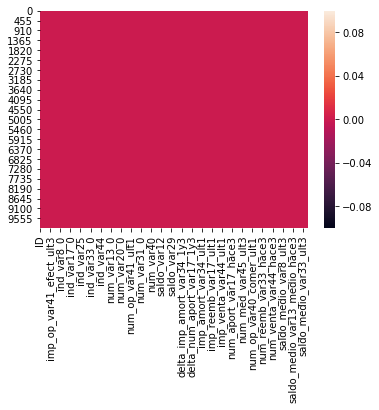

In [41]:
#df.isnull().sum()
sns.heatmap(df.isnull())

In [5]:
X_train=df.drop(columns=['TARGET'],axis=1)
y=df['TARGET']

# Feature Selection- Dropping constant features
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [6]:
# using sklearn variancethreshold to find constant features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train) # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [7]:
X_train.columns[var_thres.get_support()] # non constant columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

85


In [8]:
X_train.drop(constant_columns, axis=1,inplace=True)

In [9]:
X_train.shape

(10000, 285)

# Removing quasi-constant features
Using variance threshold from sklearn
Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

Here, I will change the default threshold to remove almost / quasi-constant features.

In [10]:
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(X_train) # fit finds the features with zero variance  # 0.1 indicates 99% of observations approximately

  # fit finds the features with low variance
    
X_train.columns[var_thres.get_support()] # non constant columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

99


# quasi-constant features(0.1 threshold)

In [11]:
X_train['ind_var1_0'].value_counts() # example

0    9889
1     111
Name: ind_var1_0, dtype: int64

In [12]:
X_train.drop(constant_columns, axis=1,inplace=True)

In [13]:
X_train.shape

(10000, 186)

# 2. Feature Selection- With Correlation¶

In [14]:
import seaborn as sns
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor = X_train.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [15]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

74

In [17]:
#corr_features

In [18]:
X_train.drop(corr_features, axis=1,inplace=True)

In [19]:
X_train.shape

(10000, 112)

# Remove features with greater than a threshold percentage of missing values

In [20]:
# Train missing values (in percent)
train_missing = (X_train.isnull().sum() / len(X_train)).sort_values(ascending = False)
train_missing.head(5)

var38                      0.0
saldo_medio_var44_hace2    0.0
num_op_var40_hace2         0.0
num_op_var40_ult1          0.0
num_op_var41_hace2         0.0
dtype: float64

In [21]:
# There are no missing values 
# Identify missing values above threshold
#train_missing = train_missing.index[train_missing > 0.75]
#print(There are 0 columns with more than 75% missing values len(train_missing ))

In [22]:
for column in X_train.columns:
    if X_train[column].dtypes==object :
        print(column)  

In [23]:
# There are no categorical columns

In [24]:
# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(X_train.select_dtypes(include=numerics).columns)
data = X_train[numerical_vars]
data.shape

(10000, 112)

In [25]:
for column in X_train.columns:
    if X_train[column].dtypes==object :
     print(column).head(10)

In [66]:
#X_train.var()
X_train.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_ult1,saldo_medio_var33_hace3,saldo_medio_var44_hace2,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,122.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [50]:
#for column in X_train.columns:
   #if X_train[column].dtypes!=object :
        #print(column, X_train[column].value_counts().unique())  

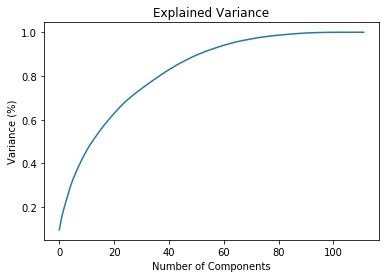

In [35]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
scalar = StandardScaler()
x_transform = scalar.fit_transform(X_train)
pca=PCA()
prinicipal_components=pca.fit_transform(x_transform)
plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 70 components. So instead of giving all 112 columns as input in our algorithm let's use these 70 principal components instead.

In [37]:
pca = PCA(n_components=70)
new_data = pca.fit_transform(x_transform)
#principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_x = pd.DataFrame(new_data)
principal_x.head(10)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-2.705551,-0.206290,0.990323,0.339404,0.471639,1.724608,-1.343186,-0.189138,-0.182090,-0.168260,...,0.008039,-0.043242,0.044994,-0.088204,-0.053533,-0.046626,0.011004,0.042746,-0.001569,-0.016395
1,0.865575,-3.271566,2.028362,1.037761,-1.844594,0.083796,-0.004763,-0.471148,-1.601900,-0.002144,...,-0.392465,-0.518952,0.496047,1.355929,-0.385589,0.092111,-0.782841,0.488682,-0.649807,0.093375
2,-1.449815,-0.041042,-0.131827,-0.073174,0.088179,-0.797516,0.819797,0.105997,0.041450,-0.091341,...,0.391037,0.206538,-0.241616,0.102580,0.150364,-0.401107,0.016620,-0.009348,-0.032357,0.063530
3,0.778212,1.219072,-0.674353,-0.146034,-0.555675,-1.371065,0.913804,0.015240,0.097379,0.380521,...,-1.233746,0.878853,0.352237,-0.398820,-0.097838,0.413184,-0.036560,-0.029322,-0.076658,0.253858
4,7.022157,-3.733268,-5.567337,-3.452154,6.579903,2.916488,-3.533870,4.173450,5.305930,-0.397051,...,0.523341,0.079567,-0.335865,-0.239500,-0.217390,0.098324,-0.372095,0.206013,-0.601057,-0.005600
5,-2.704877,-0.208592,0.993289,0.341423,0.472415,1.731599,-1.349380,-0.191005,-0.177778,-0.170543,...,0.004705,-0.043190,0.041722,-0.086879,-0.053586,-0.044451,0.012792,0.039560,0.001331,-0.018467
6,-1.010001,-0.025673,-0.355238,-0.147278,-0.044538,-1.215974,1.121968,0.112312,0.057575,-0.076934,...,-0.107470,-0.165390,0.160334,-0.139595,0.002833,0.264137,-0.096329,-0.064710,-0.006498,-0.004307
7,-1.098504,-0.039687,-0.318050,-0.131216,-0.019672,-1.162585,1.108894,0.137720,0.102602,-0.035368,...,-0.100792,-0.147479,0.148636,-0.134285,-0.069465,0.235551,-0.072168,-0.135155,0.004216,0.034621
8,-2.479752,-0.319810,1.025223,0.362427,0.474852,1.841005,-1.487795,-0.175386,-0.098025,-0.146352,...,-0.011122,0.015609,0.074709,-0.012813,0.015114,0.022247,-0.021823,-0.035671,-0.001718,-0.013905
9,-1.390916,-0.088647,-0.166012,-0.075855,0.082393,-0.921372,0.997522,0.150017,0.225711,0.128708,...,-0.133838,-0.142211,0.147024,-0.147608,-0.129913,0.256014,-0.089767,-0.051781,-0.023283,-0.028612


In [ ]:
Since the LightGBM model does not need missing values to be imputed, we can directly fit on the training data. We will use Early Stopping to determine the optimal number of iterations and run the model twice, averaging the feature importances to try and avoid overfitting to a certain set of features.

Optimal number of features: 81
Selected features: ['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_sal_var16_ult1', 'ind_var5', 'ind_var30', 'ind_var39_0', 'num_var4', 'num_var5_0', 'num_var8_0', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_largo_0', 'num_var14_0', 'num_var24_0', 'num_op_var41_hace2', 'num_op_var41_hace3', 'num_op_var41_ult1', 'num_var30_0', 'saldo_var5', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13', 'saldo_var14', 'saldo_var26', 'saldo_var30', 'saldo_var37', 'var36', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var13_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_venta_var

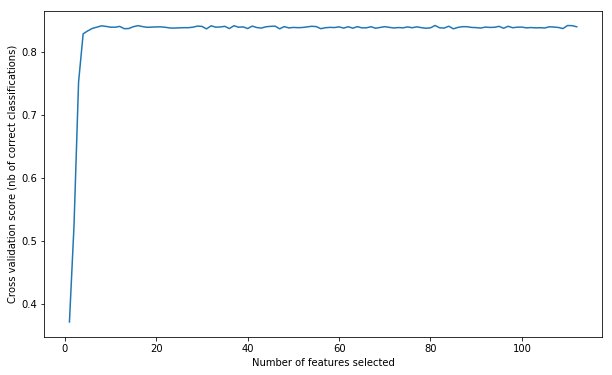

In [49]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
y=df['TARGET']
clf=DecisionTreeClassifier()
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

[1.96949361e-01 2.01772683e-03 1.86936045e-01 5.36877558e-03
 7.68778499e-03 7.02625966e-03 5.96990429e-04 4.78734291e-04
 1.23012476e-03 1.57459129e-03 6.10536570e-04 7.29301639e-03
 1.15054292e-02 8.81555400e-03 2.91426046e-06 3.47713838e-03
 8.58078739e-03 2.76268250e-03 7.06925952e-03 3.85177054e-03
 4.87189913e-03 5.50049867e-04 6.22188901e-04 3.40606267e-04
 5.51276871e-04 4.95771264e-05 1.04803496e-03 2.34806452e-04
 2.02680084e-03 1.25501207e-04 4.28174100e-04 8.31392801e-03
 1.83397539e-03 6.21431738e-03 1.92697899e-03 1.28257032e-03
 2.60280762e-03 2.17573549e-03 3.06085919e-03 1.21966100e-02
 0.00000000e+00 1.45493958e-03 3.95402104e-04 1.60504864e-04
 1.08786024e-05 3.73786531e-04 2.63965133e-04 4.32582924e-06
 0.00000000e+00 3.96675865e-03 1.39982761e-02 1.90687564e-04
 1.63497330e-07 1.11723175e-06 3.30897910e-03 1.17603342e-07
 1.16122106e-02 1.73651704e-04 5.05183054e-07 3.16308023e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.96740775e-05 2.967039

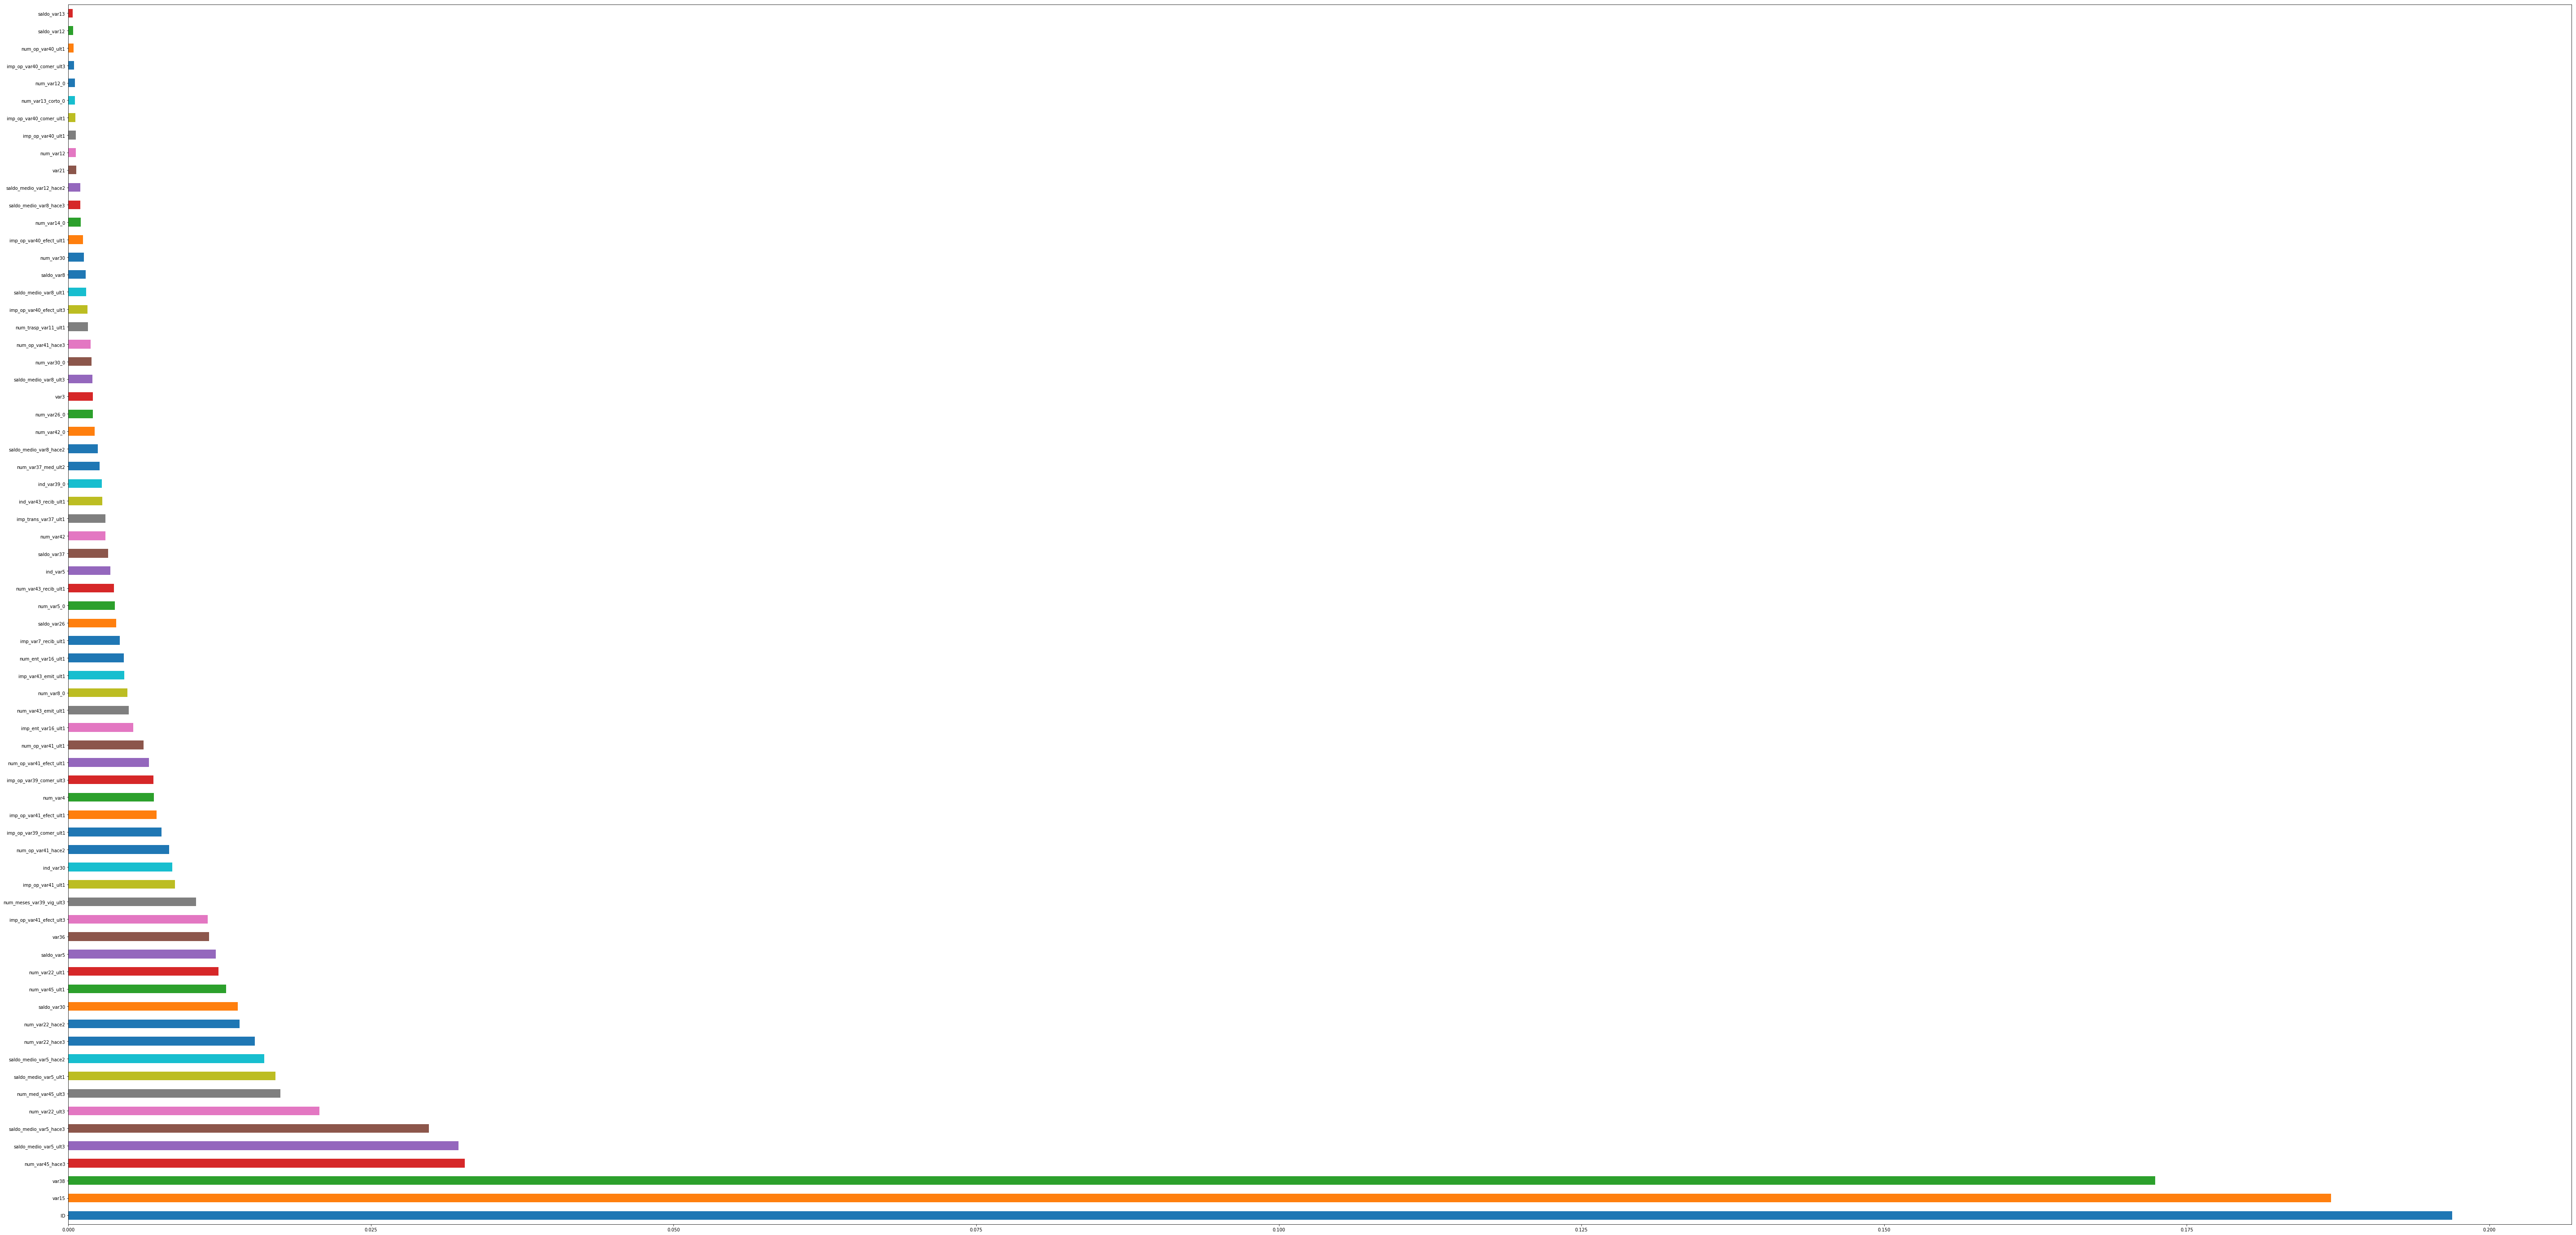

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X_train,y)
ExtraTreesClassifier(random_state=101)
print(model.feature_importances_)
plt.figure(figsize=(100,50))
pd.Series(model.feature_importances_, index = X_train.columns).nlargest(70).plot(kind = 'barh')
plt.show()


In [53]:
df['TARGET'].value_counts()

0    9612
1     388
Name: TARGET, dtype: int64

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 70 of the best features

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=70)
#fit = bestfeatures.fit(X_train,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#featureScores

In [64]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
#mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
#mutual_info
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False)
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))